# Machine Learning - Case Study

In this notebook we will take a look at another dataset and use our EDA skills to do a complete end-to-end model building exercise. 


The dataset we will use is Bike rentals demand dataset available on Kaggle:
https://www.kaggle.com/lakshmi25npathi/bike-rental-count-prediction-using-python


The purpose of the model is to predict bike rental demands. Here is a description of the available columns.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.metrics import mean_squared_log_error, r2_score
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Columns description:
    
    datetime — hourly date + timestamp 
    season — 1 = spring, 2 = summer, 3 = fall, 4 = winter 
    holiday — whether the day is considered a holiday
    workingday — whether the day is neither a weekend nor holiday
    weather — 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    temp — temperature in Celsius
    atemp — “feels like” temperature in Celsius
    humidity — relative humidity
    windspeed — wind speed
    casual — number of non-registered user rentals initiated
    registered — number of registered user rentals initiated
    count — number of total rentals

In [145]:
filename = 'day.csv'
data = pd.read_csv(filename)
df = data.copy()

In [146]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Exploration
Before we dive in, We'll perform our data cleaning checklist. Get insights if whether any action is required for:
- duplicated values
- missing values 
- column types 



In [148]:
df.duplicated().any()

False

In [149]:
df.isna().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Data Preparation

### Features involving Datetime

In the case of features that involve datetime data type, we need to convert these dates or timestamps into numerical data that the model can consume. Some examples of possibly extracted information from datetime are:
- Seconds/Minutes/Hours
- Months/days/years
- Differential (rate of change, days etc. elapsed)

In [151]:
# Pre processing train data
# Adding time and month to the dataframe using datatime column
df['datetime'] = pd.to_datetime(df['dteday'])
time=[]
month=[]
for i in df['datetime']:
    time.append(i.hour)
    month.append(i.month)
df['time'] = pd.DataFrame(time)
df['time'] = df['time'].astype(float)
df['month'] = pd.DataFrame(month)
df['month'] = df['month'].astype(float)

In [137]:
# Dropping datetime column
# df.drop('datetime',axis=1,inplace=True) 
df = df.drop('datetime',axis=1,inplace=False) 

### Features involving Categorical Data 

In case of categorical data (such as gender, and in this particular case, seasons and weather), the usual approach is to convert those into dummy variables with corresponding zeros and ones as values. For example, if we have a single column for gender, with the values M to represent male and F to represent female, we transform it into two dummy variables:
- gender_male 
- gender_female 

In case a row corresponds to male gender, the respective values for these two columns would be:

    gender_male     gender_female
        1                 0
        
And so on. This can be easily performed using a special pandas function called `get_dummies()`

In [152]:
df = pd.get_dummies(df, columns=['season', 'weathersit', 'month'])

### Handling Missing Values 

As we have previously discussed in our data cleaning checklist, filling missing values for numeric data is easier since we can use medians and averages to fill missing data without impacting the overall distribution of our dataset.

In [ ]:
# Median imputation
for i in df.columns:
    df[i].fillna(value= df[i].median())

In [61]:
# add your code here 

In [169]:
temp = pd.to_datetime(df['dteday'])

In [184]:
workingd = []
for i in temp:
    date = pd.to_datetime(i)
    if i.day_name() in ['Saturday', 'Sunday']:
#        0 corresponds to non working day
        workingd.append(0)
    else:
        workingd.append(1)

In [185]:
workingd

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


### Food for Thought

Do you think demands of vehicle rentals would be different over the weekdays vs. over the weekends?

In [218]:
# Segregating data based on ‘workingday’ column
# df = df.drop(['dteday', 'datetime'],axis=1)
work_day = df[df['workingday']==1] 
non_work_day = df[df['workingday']==0]
# Model for registered
# x = work_day.drop(['casual','registered','cnt'],axis = 1)
x = work_day[['temp', 'instant', 'yr', 'mnth']]
y = work_day['cnt']

In [219]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

### Selecting Features 

Based on correlations, let's select features for our model. 

<AxesSubplot:>

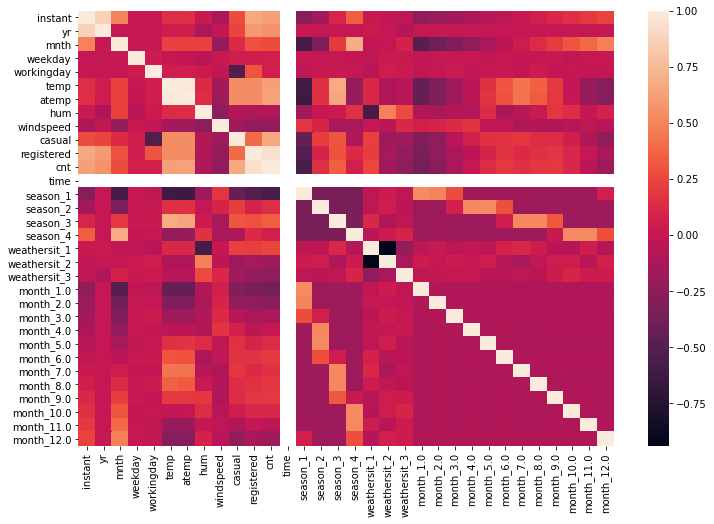

In [216]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df.corr())

In [202]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       5 non-null      int64  
 1   yr            5 non-null      int64  
 2   mnth          5 non-null      int64  
 3   weekday       5 non-null      int64  
 4   workingday    5 non-null      int64  
 5   temp          5 non-null      float64
 6   atemp         5 non-null      float64
 7   hum           5 non-null      float64
 8   windspeed     5 non-null      float64
 9   casual        5 non-null      int64  
 10  registered    5 non-null      int64  
 11  cnt           5 non-null      int64  
 12  time          5 non-null      float64
 13  season_1      5 non-null      uint8  
 14  season_2      5 non-null      uint8  
 15  season_3      5 non-null      uint8  
 16  season_4      5 non-null      uint8  
 17  weathersit_1  5 non-null      uint8  
 18  weathersit_2  5 non-null      uint

In [ ]:
['temp', 'instant', 'yr', 'mnth']

## Model Building 

Finally, now that we have selected our model. Let's build a simple linear regression model and assess its performance.

In [220]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

msle=mean_squared_log_error(y_pred,y_test)
r2 = r2_score(y_pred, y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
print('Rsquared for the data:',r2)

RMLSE for the data: 0.5461422450478273
Rsquared for the data: 0.5998275960461641
